<img src="http://escolar.itam.mx/centro_tesis/img/logo-ITAM.png" style="width:250px">
# Machine Learning

## Neural Networks
Tarea 7 : Gustavo Augusto Mondragón Sánchez : 136894

### Introducción:
Una red neuronal es un modelo computacional basado en el comportamiento cerebral, una gran simplificación de su funcionamiento. La base del modelo es la neurona, cada neurona suma hace una suma de sus entradas y se *activa* al alcanzar un umbral determinado. Cada neurona se encuentra conectada a otras neuronas. Con lo anterior se consigue que la transmisión de información a través de una neurona sólo sea posible cuando se alcanza este umbral. 
Estos sistemas de neuronas aprenden por si solos haciendo una configuración de sus parámetros de acuerdo a ciertas reglas, maximizar o minimizar cierta función.

#### Estructura de una neurona artificial:
<img src="https://www.ibiblio.org/pub/linux/docs/LuCaS/Presentaciones/200304curso-glisa/redes_neuronales/curso-glisa-redes_neuronales-html/neuronaa.jpg">
*El proceso de aprendizaje se lleva a cabo variando los valores de w*

[Wikipedia, Red neuronal artificial](https://es.wikipedia.org/wiki/Red_neuronal_artificial)

### Objetivos:
* Implementar distintas redes neuronales utilizando el framework de TensorFlow

## Librerías:

In [60]:
import pandas as pd
import numpy as np
import csv
import random as rnd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mtpl
%matplotlib inline

## Problema 1: 
Entrenar una regresión logística para las funciones AND y XOR usando TensorFlow

### Función AND

Exactitud:  100.0 %


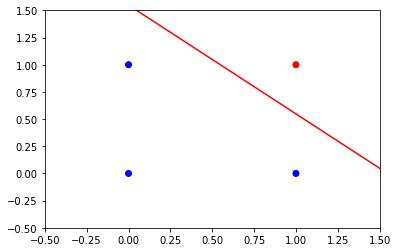

In [7]:
#Datos:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[0],[0],[1]])

#Declaración de variables:
input_size=2
output_layer_size=1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real
#La variables para lo que se va a ir calculando y modificando en el camino
W_layer1=tf.Variable(tf.random_uniform([input_size,output_layer_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer1")

#Operaciones, grafo:
y = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) #la de nuestra
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
#lossfn= tf.reduce_mean(( (y_ * tf.log(y)) +  
 # ((1 - y_) * tf.log(1.0 - y)) ) * -1) # cross entropy
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

#Ejeción del programa:
init = tf.global_variables_initializer()
sess = tf.Session() # tipo de sesion, puede ser interactiva

sess.run(init)
for i in range(5000):
    sess.run(train_step, feed_dict={x: X, y_: Y})

#Cuantificar el error:
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Exactitud: ",sess.run(accuracy, feed_dict={x: X, y_: Y})*100,"%") # las corremos

#Visualizar la partición del espacio:
w=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]
m=((w[0]/w[2]))/((-w[0]/w[1]))
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
plt.plot(x2,-w[0]/w[2]+m*x2,color='red')
plt.ylim([-0.5,1.5])
plt.xlim([-0.5,1.5])
plt.show()

#Cerrar sesión:
sess.close()

### Función XOR

Exactitud:  50.0 %


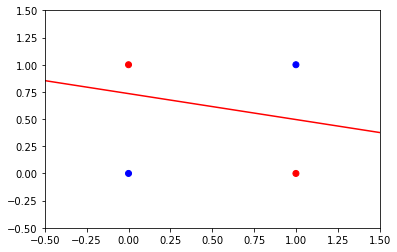

In [11]:
#Datos:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[1],[1],[0]])

#Declaración de variables:
input_size=2
output_layer_size=1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real
#La variables para lo que se va a ir calculando y modificando en el camino
W_layer1=tf.Variable(tf.random_uniform([input_size,output_layer_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer1")

#Operaciones, grafo:
y = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) #la de nuestra
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
#lossfn= tf.reduce_mean(( (y_ * tf.log(y)) +  
 # ((1 - y_) * tf.log(1.0 - y)) ) * -1) # cross entropy
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

#Ejeción del programa:
init = tf.global_variables_initializer()
sess = tf.Session() # tipo de sesion, puede ser interactiva

sess.run(init)
for i in range(5000):
    sess.run(train_step, feed_dict={x: X, y_: Y})

#Cuantificar el error:
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Exactitud: ",sess.run(accuracy, feed_dict={x: X, y_: Y})*100,"%") # las corremos

#Visualizar la partición del espacio:
w=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]
m=((w[0]/w[2]))/((-w[0]/w[1]))
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
plt.plot(x2,-w[0]/w[2]+m*x2,color='red')
plt.ylim([-0.5,1.5])
plt.xlim([-0.5,1.5])
plt.show()

#Cerrar sesión:
sess.close()

## Problema 2: 
Train a ANN for the XOR problem and create a visualization that enables you to visualize the decision boudaries

Exactitud:  100.0 %


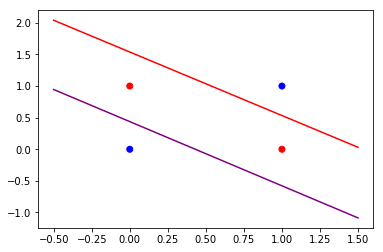

In [98]:
#Datos:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[1],[1],[0]])

#Declaración de variables:
input_size=2
hiden_size=2
output_size=1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_size]) #la y real
#La variables para lo que se va a ir calculando y modificando en el camino
weights = {
    'w_hl': tf.Variable(tf.random_uniform([input_size, hiden_size])),
    'w_out': tf.Variable(tf.random_uniform([hiden_size, output_size]))
}
biases = {
    'b_hl': tf.Variable(tf.zeros([hiden_size])),
    'b_out': tf.Variable(tf.zeros([output_size]))
}

#Modelo, grafo:
# Cada oculta completamente conectada:
hlayer = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['w_hl']), biases['b_hl']))
# Salida completamente conectada (una salida)
y = tf.nn.sigmoid(tf.matmul(hlayer, weights['w_out']) + biases['b_out'])
#Funcion de pérdida
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
#Optimizador
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

#Ejeción del programa:
init = tf.global_variables_initializer()
sess = tf.Session() # tipo de sesion, puede ser interactiva

sess.run(init)
for i in range(100000):
    sess.run(train_step, feed_dict={x: X, y_: Y})
        
#Cuantificar el error:
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Exactitud: ",sess.run(accuracy, feed_dict={x: X, y_: Y})*100,"%") # las corremos

#Visualizar la partición del espacio:
bs=[sess.run(biases["b_hl"], feed_dict={x: X, y_: Y})][0]
ws=[sess.run(weights["w_hl"], feed_dict={x: X, y_: Y})][0]

x2 = np.linspace(-0.5,1.5,100) # 100 numeros espaciados
recta1 = -bs[0]/ws[1,0]-ws[0,0]*x2/ws[1,0]
recta2 = -bs[1]/ws[1,1]-ws[0,1]*x2/ws[1,1]

plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])

plt.plot(x2,recta1,color='red')
plt.plot(x2,recta2,color='purple')
#plt.ylim([-0.5,1.5])
#plt.xlim([-0.5,1.5])
plt.show()

#Cerrar sesión:
sess.close()

## Problema 3: Train a ANN that identifies points inside a circle (generate the data yourself). Experiment with the number of neurons in the intermediate layer

0 Exactitud:  39.3999993801 %
1000 Exactitud:  38.8999998569 %
2000 Exactitud:  38.8999998569 %
3000 Exactitud:  38.8999998569 %
4000 Exactitud:  38.8999998569 %
5000 Exactitud:  38.8999998569 %
6000 Exactitud:  38.8999998569 %
7000 Exactitud:  38.8999998569 %
8000 Exactitud:  38.8999998569 %
9000 Exactitud:  38.8999998569 %


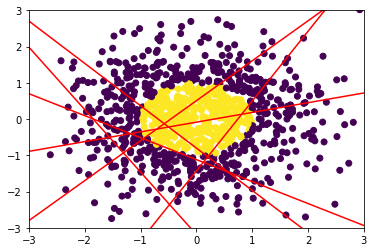

In [159]:
#Datos:
npuntos = 1000
mu = 0
var = 1
X1 = np.random.normal(mu, var, npuntos)
X2 = np.random.normal(mu, var, npuntos)
X = np.array([X1,X2]).reshape(npuntos,2)
Y = np.array(X1**2 + X2**2 < 1).reshape(npuntos,1)

#Declaración de variables:
input_size=2
hiden_size=8
output_size=1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_size]) #la y real
#La variables para lo que se va a ir calculando y modificando en el camino
weights = {
    'w_hl': tf.Variable(tf.random_uniform([input_size, hiden_size])),
    'w_out': tf.Variable(tf.random_uniform([hiden_size, output_size]))
}
biases = {
    'b_hl': tf.Variable(tf.random_uniform([hiden_size])),
    'b_out': tf.Variable(tf.random_uniform([output_size]))
}

#Modelo, grafo:
# Capa oculta completamente conectada:
hlayer = tf.nn.tanh(tf.add(tf.matmul(x, weights['w_hl']), biases['b_hl']))
# Salida completamente conectada (una salida)
y = tf.nn.tanh(tf.matmul(hlayer, weights['w_out']) + biases['b_out'])
#Funcion de pérdida
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
#Optimizador
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

#Ejeción del programa:
init = tf.global_variables_initializer()
sess = tf.Session() # tipo de sesion, puede ser interactiva

sess.run(init)
n=10000
for i in range(n):
    sess.run(train_step, feed_dict={x: X, y_: Y})
    if i%(n*1.0/10)==0:
        correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        acc[i] = sess.run(accuracy, feed_dict={x: X, y_: Y})*100
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(i,"Exactitud: ",sess.run(accuracy, feed_dict={x: X, y_: Y})*100,"%") # las corremos
        
#Cuantificar el error:
#correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
#accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#print("Exactitud: ",sess.run(accuracy, feed_dict={x: X, y_: Y})*100,"%") # las corremos

#Visualizar la partición del espacio:
bs=[sess.run(biases["b_hl"], feed_dict={x: X, y_: Y})][0]
ws=[sess.run(weights["w_hl"], feed_dict={x: X, y_: Y})][0]

ng=100
x2 = np.linspace(-3.0,3.0,ng) # 100 numeros espaciados
Y2 = np.array(X1**2 + X2**2 < 1)
plt.scatter(X1,X2,c=Y2)
rectas = np.zeros((hiden_size,ng))
for i in range(0,hiden_size):
    rectas[i] = -bs[i]/ws[1,i]-ws[0,i]*x2/ws[1,i]
    plt.plot(x2,rectas[i],color='red')

plt.xlim(-3.0,3.0)
plt.ylim(-3.0,3.0)
plt.show()

#Cerrar sesión:
sess.close()

## Problema 4: Optional: Plot the error vs the model complexity